#### GENERAL INFORMATION 
The telecommunications sector has become one of the main industries in
developed countries. The technical progress and the increasing number of
operators raised the level of competition. Companies are working hard to survive
in this competitive market depending on multiple strategies. Three main
strategies have been proposed to generate more revenues:
-  Acquire new customers
-  Upsell the existing customers
- Increase the retention period of customers 

#### Customer Churn is one of the most important and challenging problems for businesses such as Credit Card companies, cable service providers, SASS and telecommunication companies worldwide. Even though it is not the most fun to look at, customer churn metrics can help businesses improve customer retention. 

The data set includes information about:
1. Customers who left within the last month – the column is called Churn
2. Services that each customer has signed up for – phone, multiple lines,
internet, online security, online backup, device protection, tech support,
and streaming TV and movies
3. Customer account information – how long they’ve been a customer,
contract, payment method, paperless billing, monthly charges, and total
charges
4. Demographic info about customers – gender, age range, and if they have
partners and dependent

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
import numpy as np

In [3]:
df=pd.read_csv("data/churn_dataset.csv") 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#checking shape of the dataset
df.shape


(7043, 21)

In [5]:
#checking the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#checking columns names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
#changing  the TotalCharges column from string to float by replacing empty values with np.nan
df["TotalCharges"]=df["TotalCharges"].replace(" ",np.nan).astype("float")

In [8]:
df["TotalCharges"].dtype

dtype('float64')

In [9]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### filling missing values in the TotalCharges Column

In [10]:
#central tendencies and dispersion of Totalcharges column
print("mean is : ",df["TotalCharges"].mean())
print("median is : ",df["TotalCharges"].median())
print("Standard deviation is : ",df["TotalCharges"].std())



mean is :  2283.3004408418697
median is :  1397.475
Standard deviation is :  2266.7713618831453


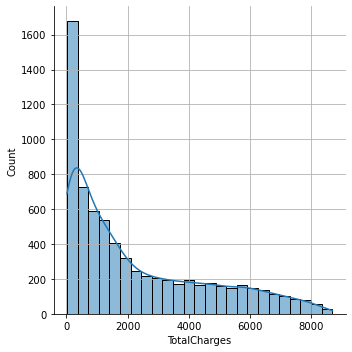

In [11]:
sns.displot(df["TotalCharges"],kde=True)
plt.grid() 

#### `from the above statistics as well as the distribution we see that   TotalCharges column is highly positively skewed, so we cannot fill the  missing values with mean.We will instead take median for filling   missing values.`

In [12]:
df["TotalCharges"]=df["TotalCharges"].replace(np.nan,df["TotalCharges"].median())

In [13]:
df["TotalCharges"].isnull().sum()

0

## UNIVARIATE ANALYSIS ON CATEGORICAL COLUMNS

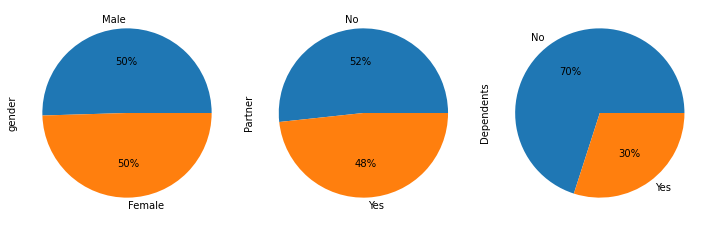

In [20]:
#plotting the count plots 
# for the columns "gender","Partner" and "Dependents".
plt.figure(figsize=(10,8))

plt.subplot(1,3,1)
df["gender"].value_counts().plot.pie(autopct="%.0f%%") 
plt.subplot(1,3,2)
df["Partner"].value_counts().plot.pie(autopct="%.0f%%") 

plt.subplot(1,3,3)
df["Dependents"].value_counts().plot.pie(autopct="%.0f%%") 

plt.tight_layout()


Yes    6361
No      682
Name: PhoneService, dtype: int64 

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 



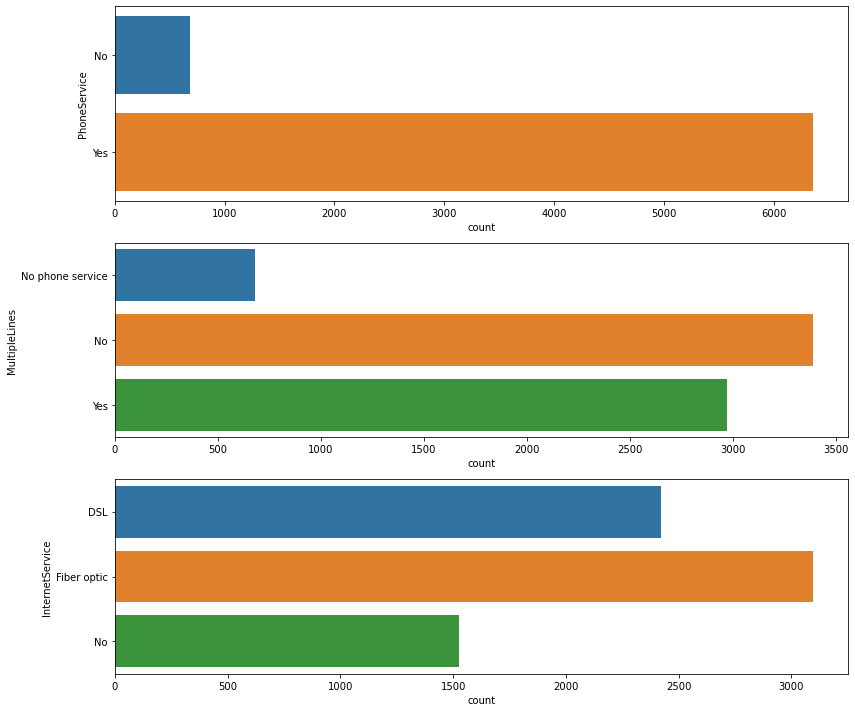

In [9]:
#plotting the count plots
#plotting the column "PhoneService","MultipleLines" and "InternetService" 
print(df["PhoneService"].value_counts(),"\n")
print(df["MultipleLines"].value_counts(),"\n")
print(df["InternetService"].value_counts(),"\n")


plt.figure(figsize=(12,10))


plt.subplot(3,1,1)
sns.countplot(data=df,y='PhoneService')


plt.subplot(3,1,2)
sns.countplot(data=df,y='MultipleLines')


plt.subplot(3,1,3)
sns.countplot(data=df,y='InternetService')


plt.tight_layout() 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64 

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64 



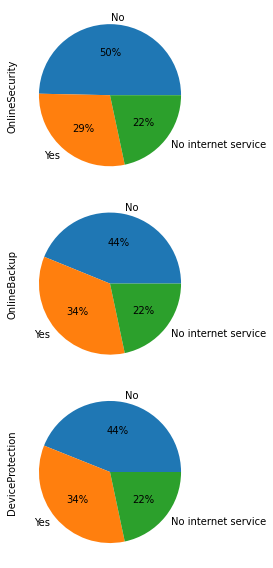

In [10]:
#plotting the count plots 
#plotting the columns "OnlineSecurity","OnlineBackup" and "DeviceProtection"
plt.figure(figsize=(10,8))
print(df["OnlineSecurity"].value_counts(),"\n")
print(df["OnlineBackup"].value_counts(),"\n")
print(df["DeviceProtection"].value_counts(),"\n")



plt.subplot(3,1,1)
df["OnlineSecurity"].value_counts().plot.pie(autopct="%.0f%%") 

plt.subplot(3,1,2)
df["OnlineBackup"].value_counts().plot.pie(autopct="%.0f%%") 


plt.subplot(3,1,3)
df["DeviceProtection"].value_counts().plot.pie(autopct="%.0f%%") 


plt.tight_layout() 

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64 

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64 

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64 



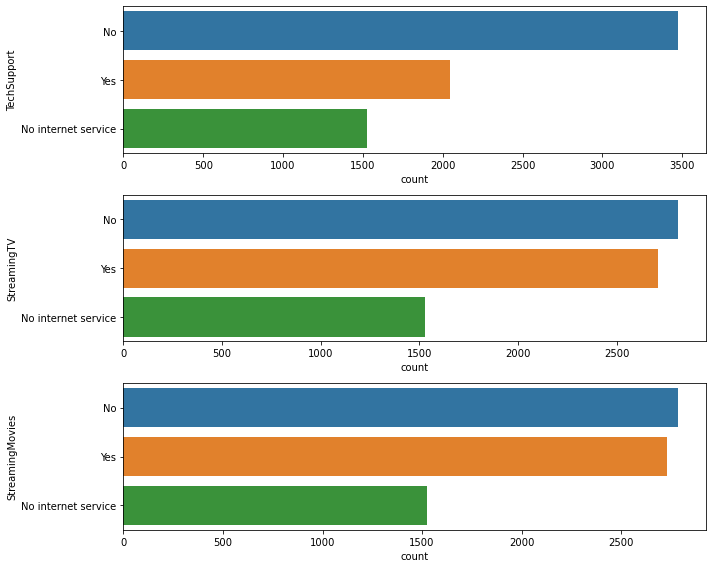

In [11]:
#plotting the count plots 
#plotting the columns "TechSupport","StreamingTV" and "StreamingMovies".

print(df['TechSupport'].value_counts(),"\n")
print(df['StreamingTV'].value_counts(),"\n")
print(df['StreamingMovies'].value_counts(),"\n")

plt.figure(figsize=(10,8))


plt.subplot(3,1,1)
sns.countplot(data=df,y='TechSupport')


plt.subplot(3,1,2)
sns.countplot(data=df,y='StreamingTV')


plt.subplot(3,1,3)
sns.countplot(data=df,y='StreamingMovies')


plt.tight_layout() 

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64 

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64 

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64 



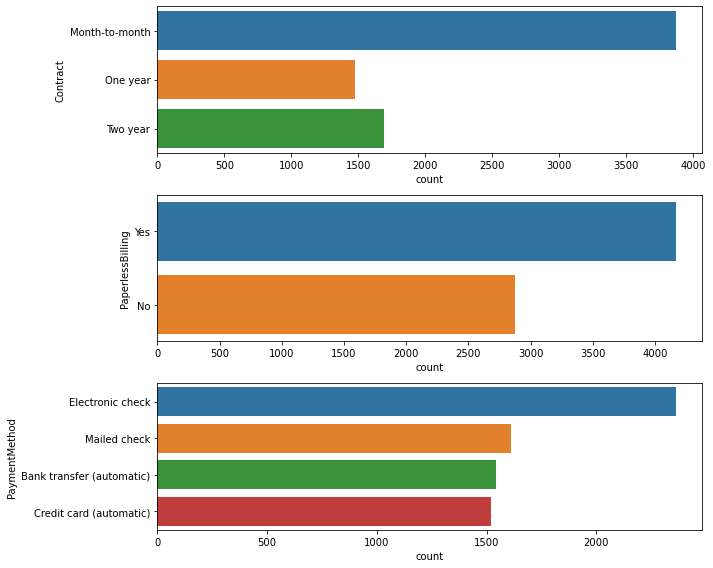

In [12]:
#plotting the count plots 
#plotting the columns "Contract","PaperlessBilling" and "PaymentMethod"
print(df['Contract'].value_counts(),"\n")
print(df['PaperlessBilling'].value_counts(),"\n")
print(df['PaymentMethod'].value_counts(),"\n")
plt.figure(figsize=(10,8))
 

plt.subplot(3,1,1)
sns.countplot(data=df,y='Contract')


plt.subplot(3,1,2)
sns.countplot(data=df,y='PaperlessBilling')


plt.subplot(3,1,3)
sns.countplot(data=df,y='PaymentMethod')


plt.tight_layout() 

### `OBSERVATION`
##### 1.- Out of 7043 people 50% are male and 50% are female. 
##### 2.- 52% of the customers are not having partners.
##### 3.- 70% of the customers are having dependents while 30 % are not having    dependents.
##### 4.- Out of 7043 people 6361 people are having phone service and 682 people are not having phone service. 
##### 5.-Out of 6361 people that are having phone services 2971 are having multiple lines.
##### 6.-In the Internet Service 3096 people are having fiberoptic type connection,2421 are having DSL(Digital Subscriber Line) connection and 1526 are not having any internet connection at all.
##### 7.-Around 29 %(2019) are having online security,50%(3498) are not having online security and 22%(1526) are not having internet connection at all.
##### 8.-Around 34% of people are having online backup,44% of people are not having online backup and 22% are not having internet.
##### 9.- Around 34% of people are having device protection,44% of people are not having device protection and 22% are not having internet.
##### 10.- 2044 people are having technical support and 3473 are not having technical suport and 1526 are not internet service.
##### 11.- 2707 people are streaming tv and 2810 are not streaming tv.
##### 12.- 2732 are streaming movies and 2785 are not streaming movies.
##### 13.- 3875 people are having monthly contract,1473 are having one year contractand 1695 are having two year contract. 
##### 14.- 4171 people go for paperless billing while 2872  people do not.
##### 15.- 2365 people pay using electronic check,1612 pay using mailed check,1544 pay by Bank transfer and 1522 pay using credit card. 

### ANALYSING THE NUMERICAL COLUMNS

In [10]:
#creating non_viz statistical function
def non_viz(column):
    
    print("The minimum value is : ",column.min())
    print("The maximum value is : ",column.max())
    print("The mean is : ",column.mean())
    print("The median is : ",column.median())
    print("The standard deviation is : ",column.std()) 
    
    

#### SENIOR CITIZEN COLUMN

In [17]:
df["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

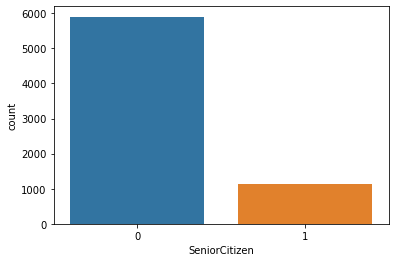

In [3]:
sns.countplot(data=df,x="SeniorCitizen")

#### `OBSERVATION FOR SENIOR CITIZEN COLUMN` 
**Out of 7043 people 1142 are senior citizens.**

#### TENURE

In [35]:
non_viz(df["tenure"])

The minimum value is :  0
The maximum value is :  72
The mean is :  32.37114865824223
The median is :  29.0
The standard deviation is :  24.55948102309423


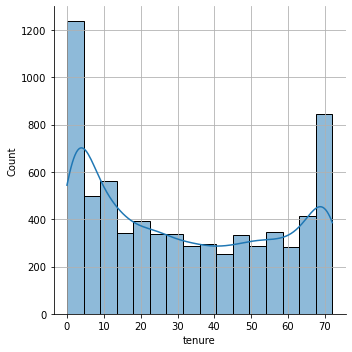

In [16]:
#plotting the distribution of tenure 
sns.displot(data=df,x="tenure",kde=True)
plt.grid() 


<AxesSubplot:ylabel='tenure'>

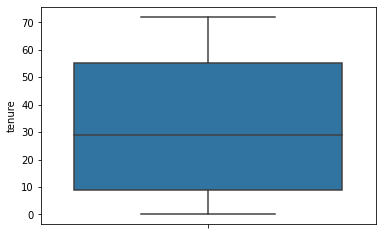

In [20]:
sns.boxplot(data=df,y="tenure")

#### `OBSERVATION FOR TENURE COLUMN`
**1.The minimum value is :  0  
The maximum value is :  72  
The mean is :  32.37114865824223  
The median is :  29.0  
The standard deviation is :  24.55948102309423  
2.The distribution is almost uniform in the range between 5 to 65 months.  
3.The frequency count is very high for 0 to 5 months and 65 to 70 months.  
4.There are no outliers.**

#### MONTHLY CHARGES 

In [36]:
non_viz(df["MonthlyCharges"])

The minimum value is :  18.25
The maximum value is :  118.75
The mean is :  64.76169246059922
The median is :  70.35
The standard deviation is :  30.09004709767854


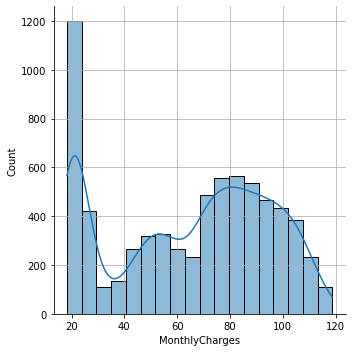

In [10]:
sns.displot(df["MonthlyCharges"],kde=True)
plt.grid() 

<AxesSubplot:ylabel='MonthlyCharges'>

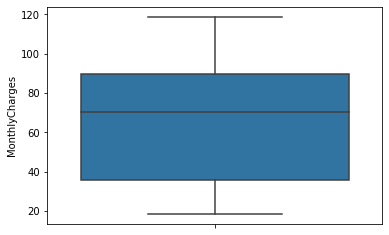

In [22]:
sns.boxplot(data=df,y="MonthlyCharges")

#### `OBSERVATION OF MONTHLY CHARGES COLUMN`
**1.The statistics for MonthlyCharges column are:  
The minimum value is :  18.25  
The maximum value is :  118.75  
The mean is :  64.76169246059922  
The median is :  70.35  
The standard deviation is :  30.09004709767854  
2.MonthlyCharges column is having non uniform distribution.Around 1200 people are giving 20 dollar as monthly charges which has the highest frequency count.  
3.Around 500 people are giving 70 to 110 dollars.   
4.Around 250 people are giving 40 to 55 dollars.**

#### TOTAL CHARGES 

In [11]:
non_viz(df["TotalCharges"])

The minimum value is :  18.8
The maximum value is :  8684.8
The mean is :  2283.3004408418697
The median is :  1397.475
The standard deviation is :  2266.7713618831453


In [14]:
print("skewness : ",df["TotalCharges"].skew()) 
  

skewness :  0.961642499724251


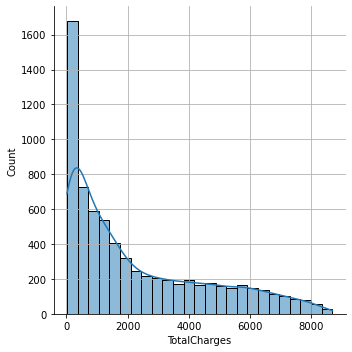

In [17]:
sns.displot(df["TotalCharges"],kde=True)
plt.grid() 

<AxesSubplot:ylabel='TotalCharges'>

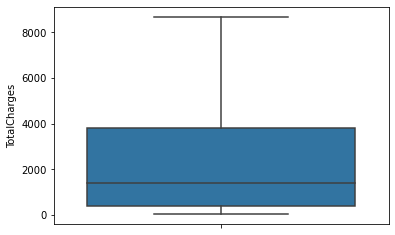

In [23]:
sns.boxplot(data=df,y="TotalCharges")

#### `OBSERVATION FOR TOTAL CHARGES COLUMN`
**1.The minimum value is :  18.8  
The maximum value is :  8684.8  
The mean is :  2283.3004408418697  
The median is :  1397.475  
The standard deviation is :  2266.7713618831453  
2.There were 11 missing values in the charges column.We replaced it with the median.  
3.Although there are no outliers in the Totalcharges column we can see that the total charges column is positively skewed with the skewness of 0.961.  
It means that some of the data points are on higher end side.  
4.More than 1600 people have total charges less than 1000.**

### BIVARIATE ANALYSIS 

#### categorical vs target  variable i.e Churn

Churn  gender
No     Female    2549
       Male      2625
Yes    Female     939
       Male       930
Name: gender, dtype: int64 

Churn  Partner
No     No         2441
       Yes        2733
Yes    No         1200
       Yes         669
Name: Partner, dtype: int64 

Churn  Dependents
No     No            3390
       Yes           1784
Yes    No            1543
       Yes            326
Name: Dependents, dtype: int64 

Churn  PhoneService
No     No               512
       Yes             4662
Yes    No               170
       Yes             1699
Name: PhoneService, dtype: int64 



<AxesSubplot:xlabel='Churn', ylabel='count'>

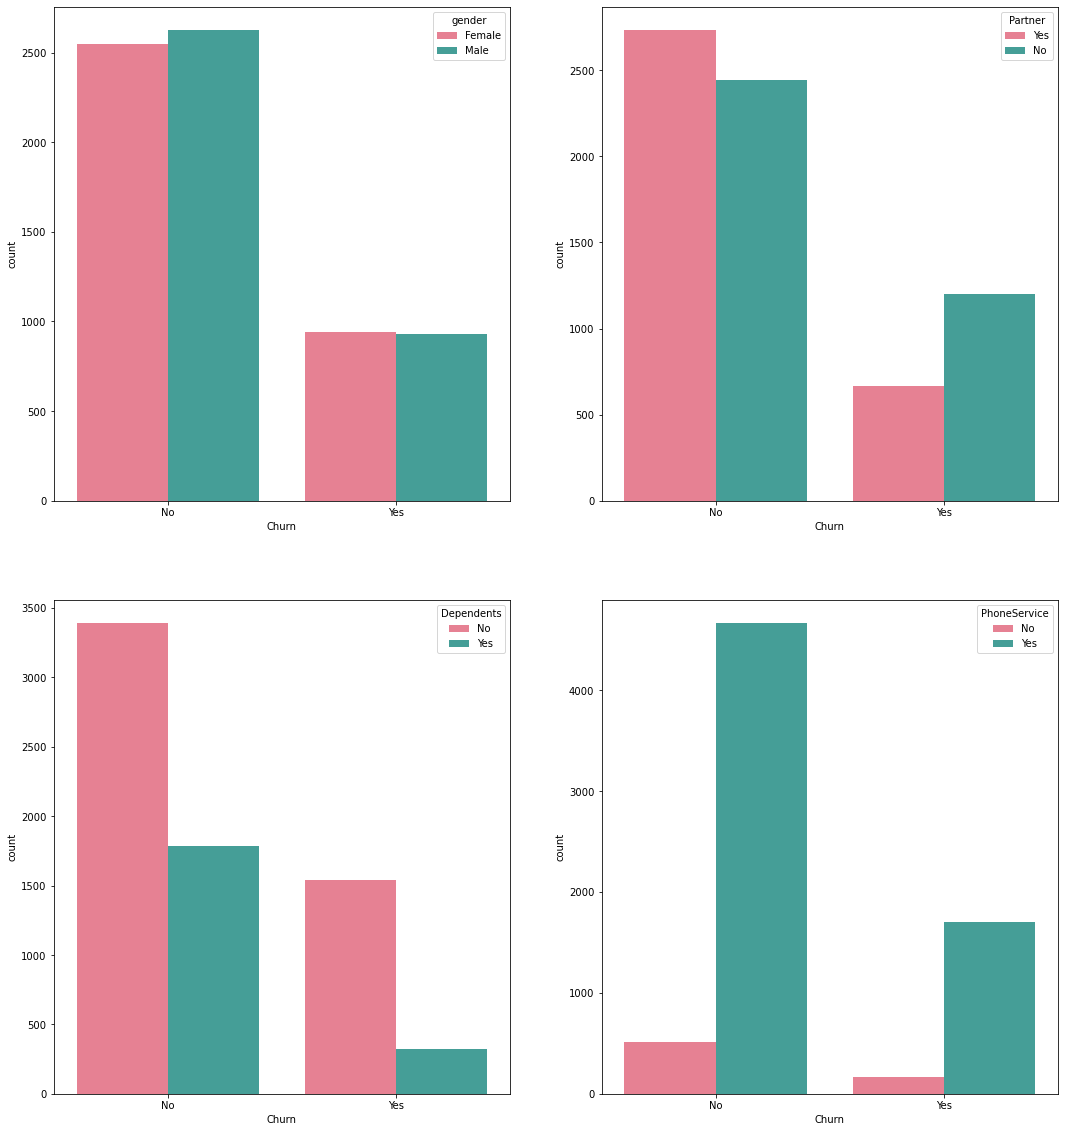

In [21]:
#"gender","partner","Dependents","PhoneService"  vs "Churn" 

#counting on the basis of churn
print(df.groupby(["Churn","gender"])["gender"].count(),"\n")
print(df.groupby(["Churn","Partner"])["Partner"].count(),"\n")
print(df.groupby(["Churn","Dependents"])["Dependents"].count(),"\n")
print(df.groupby(["Churn","PhoneService"])["PhoneService"].count(),"\n") 

#creating subplots for the countplots
plt.figure(figsize=(18,20))

plt.subplot(2,2,1)
sns.countplot(x="Churn",hue="gender",data=df,palette="husl")

plt.subplot(2,2,2)
sns.countplot(x="Churn",hue="Partner",data=df,palette="husl")

plt.subplot(2,2,3)
sns.countplot(x="Churn",hue="Dependents",data=df,palette="husl")

plt.subplot(2,2,4)
sns.countplot(x="Churn",hue="PhoneService",data=df,palette="husl") 



Churn  MultipleLines   
No     No                  2541
       No phone service     512
       Yes                 2121
Yes    No                   849
       No phone service     170
       Yes                  850
Name: MultipleLines, dtype: int64 

Churn  InternetService
No     DSL                1962
       Fiber optic        1799
       No                 1413
Yes    DSL                 459
       Fiber optic        1297
       No                  113
Name: InternetService, dtype: int64 

Churn  OnlineSecurity     
No     No                     2037
       No internet service    1413
       Yes                    1724
Yes    No                     1461
       No internet service     113
       Yes                     295
Name: OnlineSecurity, dtype: int64 

Churn  OnlineBackup       
No     No                     1855
       No internet service    1413
       Yes                    1906
Yes    No                     1233
       No internet service     113
       Yes               

<AxesSubplot:xlabel='Churn', ylabel='count'>

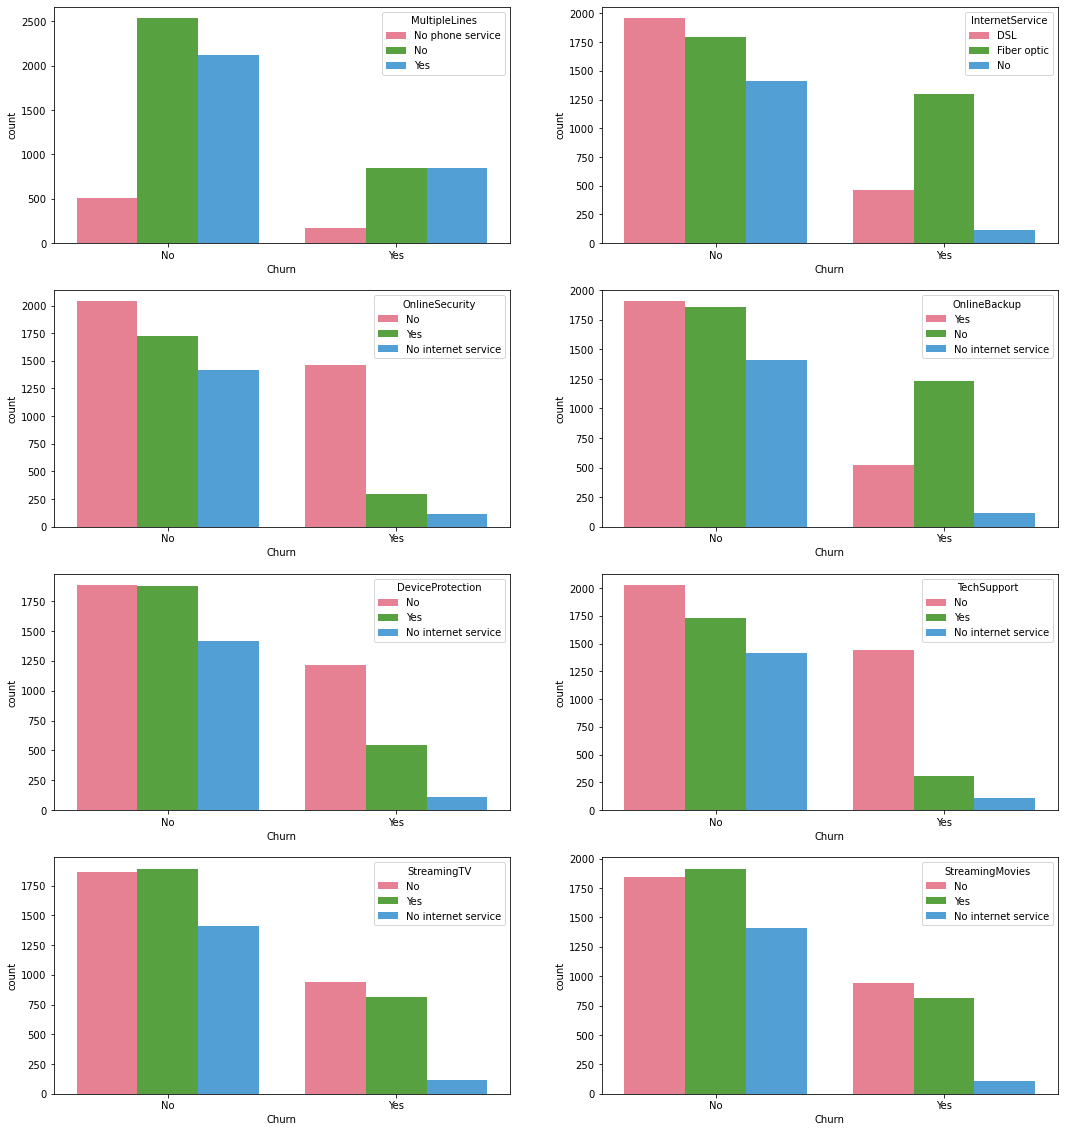

In [23]:
#MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 
#'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', vs Churn

#counting on the basis of churn
print(df.groupby(["Churn","MultipleLines"])["MultipleLines"].count(),"\n")
print(df.groupby(["Churn","InternetService"])["InternetService"].count(),"\n")
print(df.groupby(["Churn","OnlineSecurity"])["OnlineSecurity"].count(),"\n")
print(df.groupby(["Churn","OnlineBackup"])["OnlineBackup"].count(),"\n")
print(df.groupby(["Churn","DeviceProtection"])["DeviceProtection"].count(),"\n") 
print(df.groupby(["Churn","TechSupport"])["TechSupport"].count(),"\n") 
print(df.groupby(["Churn","StreamingTV"])["StreamingTV"].count(),"\n") 
print(df.groupby(["Churn","StreamingMovies"])["StreamingMovies"].count(),"\n") 

#creating subplots for the countplots
plt.figure(figsize=(18,20))

plt.subplot(4,2,1)
sns.countplot(x="Churn",hue="MultipleLines",data=df,palette="husl")

plt.subplot(4,2,2)
sns.countplot(x="Churn",hue="InternetService",data=df,palette="husl")

plt.subplot(4,2,3)
sns.countplot(x="Churn",hue="OnlineSecurity",data=df,palette="husl")

plt.subplot(4,2,4)
sns.countplot(x="Churn",hue="OnlineBackup",data=df,palette="husl") 

plt.subplot(4,2,5)
sns.countplot(x="Churn",hue="DeviceProtection",data=df,palette="husl") 

plt.subplot(4,2,6)
sns.countplot(x="Churn",hue="TechSupport",data=df,palette="husl") 

plt.subplot(4,2,7)
sns.countplot(x="Churn",hue="StreamingTV",data=df,palette="husl") 

plt.subplot(4,2,8)
sns.countplot(x="Churn",hue="StreamingMovies",data=df,palette="husl") 





Churn  PaperlessBilling
No     No                  2403
       Yes                 2771
Yes    No                   469
       Yes                 1400
Name: PaperlessBilling, dtype: int64 

Churn  Contract      
No     Month-to-month    2220
       One year          1307
       Two year          1647
Yes    Month-to-month    1655
       One year           166
       Two year            48
Name: Contract, dtype: int64 
g


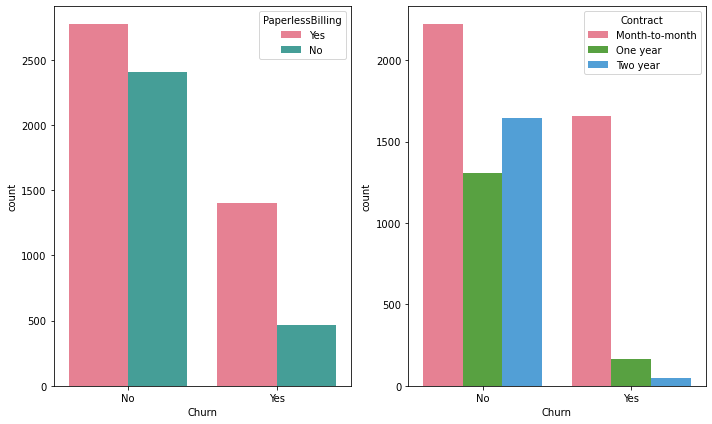

In [24]:
#"PaperlessBilling","PaymentMethod" 
print(df.groupby(["Churn","PaperlessBilling"])["PaperlessBilling"].count(),"\n")
print(df.groupby(["Churn","Contract"])["Contract"].count(),"\ng")

plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.countplot(data=df,x="Churn",hue="PaperlessBilling",palette="husl")

plt.subplot(1,2,2)
sns.countplot(data=df,x="Churn",hue="Contract",palette="husl") 

plt.tight_layout()

Churn  PaymentMethod            
No     Bank transfer (automatic)    1286
       Credit card (automatic)      1290
       Electronic check             1294
       Mailed check                 1304
Yes    Bank transfer (automatic)     258
       Credit card (automatic)       232
       Electronic check             1071
       Mailed check                  308
Name: PaymentMethod, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Churn'>

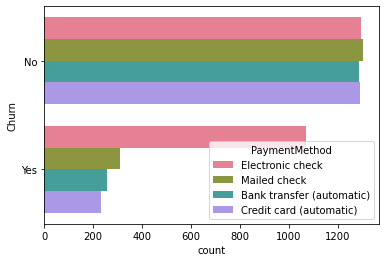

In [25]:
#PaymentMethod
print(df.groupby(["Churn","PaymentMethod"])["PaymentMethod"].count()) 

sns.countplot(data=df,y="Churn",hue="PaymentMethod",palette="husl")

#### `OBSEVATION FOR CATEGORICAL VS CHURN `
**1.The ratio for male and female who churns are almost equal.  
2.People having no partners are 2 times more likely to churn.  
3.People having no dependents are 3 times more likely to churn.  
4.Those having phone services who churn are 1699 in numbers as compared to those 170 who do not have phone service.  
5.MulipleLines is having no effect on churn as there are almost equal people who churn having MultipleLines and not having MultipleLines.  
6.Fiberoptic internet connection is having 2.82  times more effect on churn than the DigitalSubscriberLine connection.   
7.Customers having no online security are 5 times more likely to churn than those not having online security.   
8.Customers having no online backup are 2.35 times more likely to churn than those not having online backup.  
9.Those not having device protection are 2 times more likely to churn.  
10.If the Technical support is not provided then the customer is 5 times more likely to churn than those provided with Technical support.   
11.StreamingTv and StreamingMovies columns doesn not have much impact on churn. 
12.Customer opting for paperless billing are 3 times more likely to churn.  
13.MonthtoMonth contract is 10 times more likely to churn than one year contract and 34 times than two year contract.  
14.People who pay by electronic cheque are 5 times more likely to churn than those opting for other payment method like,mailed checque,Bank Transfer,credit card.** 

### numerical columns vs target variable (churn)

Churn  SeniorCitizen
No     0                4508
       1                 666
Yes    0                1393
       1                 476
Name: SeniorCitizen, dtype: int64
Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64
Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64
Churn
No     2552.882494
Yes    1531.796094
Name: TotalCharges, dtype: float64


<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

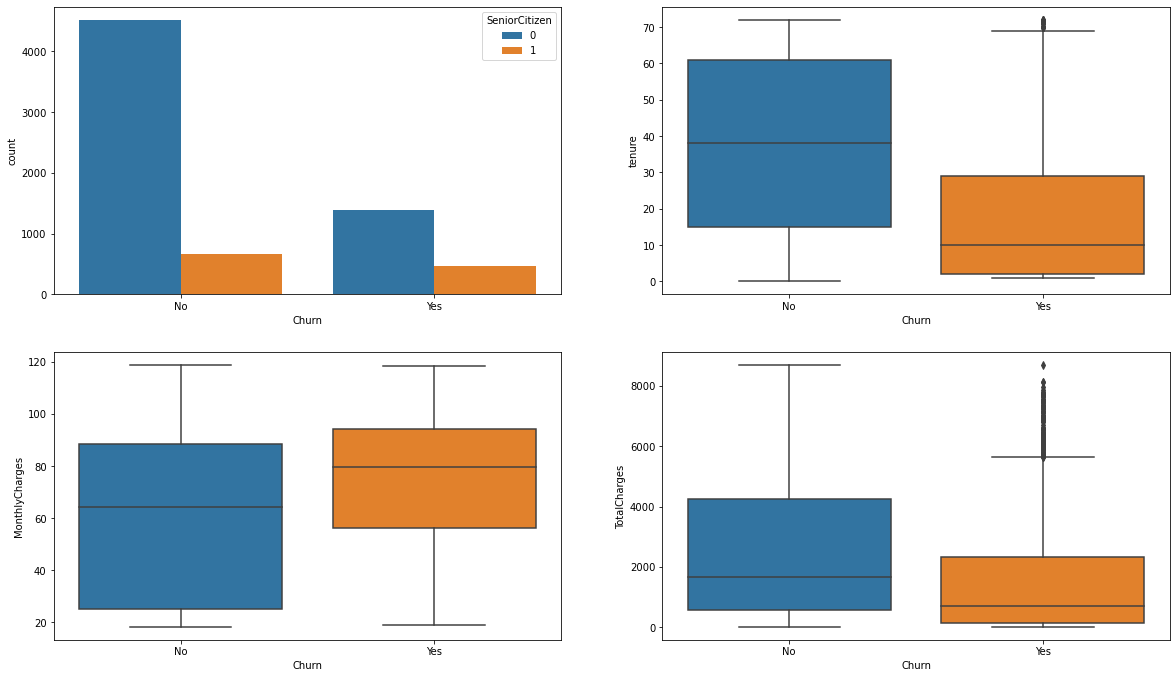

In [16]:
# calculating average on the basis of churn 
print(df.groupby(["Churn","SeniorCitizen"])["SeniorCitizen"].count())
print(df.groupby("Churn")["tenure"].mean()) 
print(df.groupby("Churn")["MonthlyCharges"].mean())
print(df.groupby("Churn")["TotalCharges"].mean())

#plotting boxplot
plt.figure(figsize=(20,18))

plt.subplot(3,2,1)
sns.countplot(data=df,x="Churn",hue="SeniorCitizen")

plt.subplot(3,2,2)
sns.boxplot(data=df,x="Churn",y="tenure") 

plt.subplot(3,2,3)
sns.boxplot(data=df,x="Churn",y="MonthlyCharges") 

plt.subplot(3,2,4)
sns.boxplot(data=df,x="Churn",y="TotalCharges")  

#### `OBSERVATION FOR SENIOR CITIZEN,TENURE,MONTHLY CHARGES AND TOTAL CHARGES COLUMN` 
**1.Out of 7043 people those who are senior citizen and churned are 476 in number.  
2.People having tenure of greater than 25 are not likely to churn i.e lesser the tenure there is more chance of churn.  
3.Customers having monthly charges greater than 60 are more likely to churn. 
4.The average total charges for which people do not churn is 2552 ,whereas average total charges for churn is 1531.**

### numerical vs numerical analysis 

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

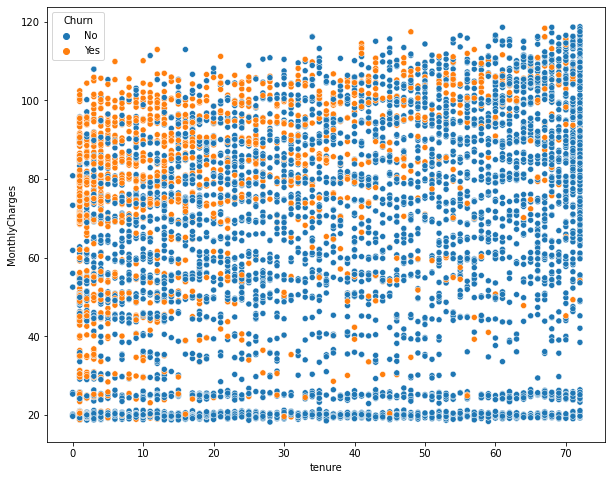

In [20]:
#tenure vs monthlycharges
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x="tenure",y="MonthlyCharges",hue="Churn")

##### Here from the above graph we can see that higher the monthly charges and lower the tenure the churn data points are frequent .When we increase the tenure we can see very few data points.

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

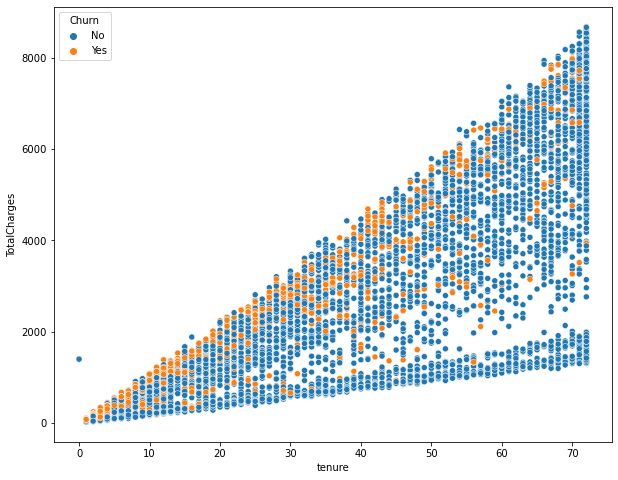

In [21]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x="tenure",y="TotalCharges",hue="Churn")

##### From the above graph we can see that as the total charges and tenure is increased the churn data points decrease in number.

### RECOMMENDATIONS

#### 1.The company should provide the customers with onlinesecurity,onlinebackup,device protection as customers having these are less likely to churn.
#### 2.The company should provide customer with Technical support frequently.  
#### 3.From month to month company can increase the contract to quaterly or trimester plan. 
#### 4.If possible company can work on monthly charges as higher monthly charges show more churn.Company can come up with innovative offers to reduce churn rate for customers paying high monthly charges. 